### Time Series Scratchpad

In [1]:
# general imports
import pandas as pd
import requests
import numpy as np
import datetime
import prepare
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### San Francisco Temps

In [2]:
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
type(df.date)

pandas.core.series.Series

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
# converting 'date' to timeseries
# df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d %I-%p')

In [6]:
# Set date to index
df = df.set_index('date').sort_index()

In [7]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
# add a new columns called 'day' which is the 'weekday'
df['day'] = df.index.day_name()
df.head()

,temp,day
date,,
2010-01-01 00:00:00,47.80,Friday
2010-01-01 01:00:00,47.40,Friday
2010-01-01 02:00:00,46.90,Friday
2010-01-01 03:00:00,46.50,Friday
2010-01-01 04:00:00,46.00,Friday


In [9]:
df.groupby('day').mean()

,temp
day,
Friday,56.80
Monday,56.95
Saturday,56.95
Sunday,56.96
Thursday,56.94
Tuesday,56.95
Wednesday,56.94


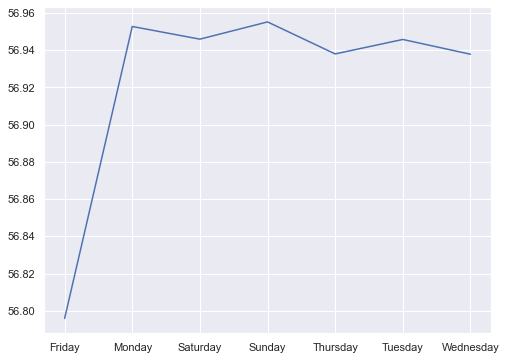

In [10]:
plt.plot(df.groupby('day').mean())

2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

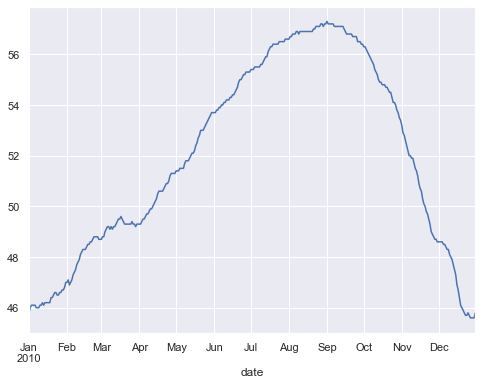

In [11]:
df.resample('D').min().temp.plot()

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

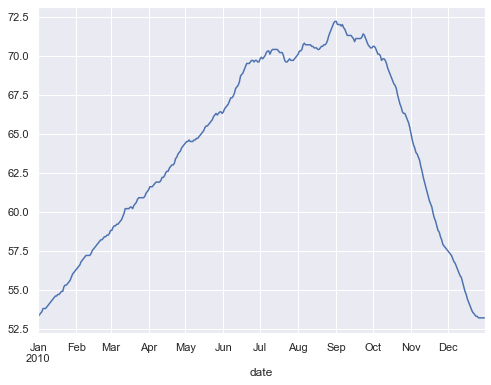

In [12]:
df.resample('D').max().temp.plot()

4. Which month is the coldest, on average?

In [13]:
df['month'] = df.index.month_name()

In [14]:
df.groupby('month').mean().nsmallest(n=1, columns='temp')

,temp
month,
January,49.98


5. Which month has the highest average temperature?

In [15]:
df.groupby('month').mean().nlargest(n=1, columns='temp')

,temp
month,
September,62.49


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [16]:
daily = df.temp.resample('D').agg(['min', 'max'])
daily.head()

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80


In [17]:
daily['temp_diff'] = daily['max'] - daily['min']
daily.head()

,min,max,temp_diff
date,,,
2010-01-01,45.80,53.30,7.50
2010-01-02,46.00,53.40,7.40
2010-01-03,46.10,53.50,7.40
2010-01-04,46.10,53.60,7.50
2010-01-05,46.10,53.80,7.70


In [18]:
daily.resample('M').max().temp_diff.sort_values(ascending=False)

date
2010-08-31   15.00
2010-09-30   14.90
2010-07-31   14.80
2010-06-30   14.80
2010-10-31   14.40
2010-05-31   13.10
2010-04-30   13.00
2010-03-31   12.00
2010-11-30   11.80
2010-02-28    9.90
2010-01-31    9.30
2010-12-31    8.90
Name: temp_diff, dtype: float64

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

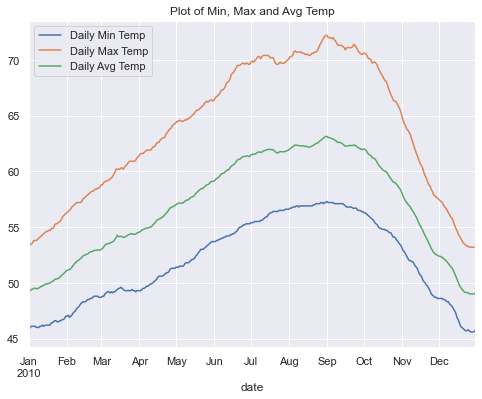

In [19]:
df.resample('D').min().temp.plot(label= "Daily Min Temp")
df.resample('D').max().temp.plot(label= "Daily Max Temp")
df.resample('D').mean().temp.plot(label= "Daily Avg Temp")
plt.title('Plot of Min, Max and Avg Temp')
plt.legend()
plt.show()

<AxesSubplot:xlabel='date'>

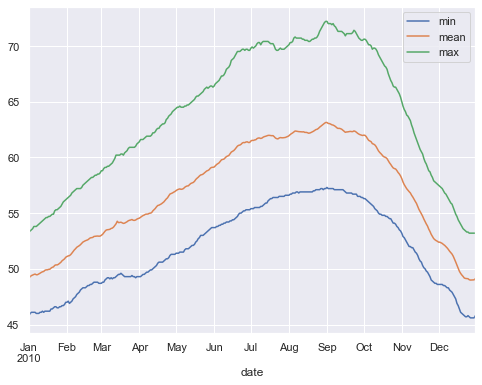

In [20]:
df.temp.resample('D').agg(['min', 'mean', 'max']).plot()

### Seattle Weather

In [21]:
from vega_datasets import data
seattle_df = data.seattle_weather()
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?

In [22]:
# Set date to index
seattle_df = seattle_df.set_index('date').sort_index()

In [23]:
seattle_df.resample('M').sum().nlargest(n=1, columns='precipitation')

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.50,259.80,118.60,134.60


2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

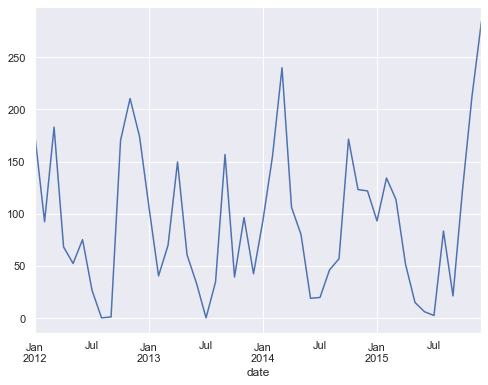

In [24]:
seattle_df.resample('M').sum().precipitation.plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

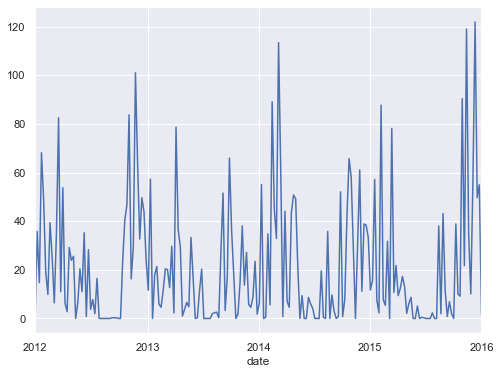

In [25]:
# Weekly
seattle_df.resample('W').sum().precipitation.plot()
# Too much noise

<AxesSubplot:xlabel='date'>

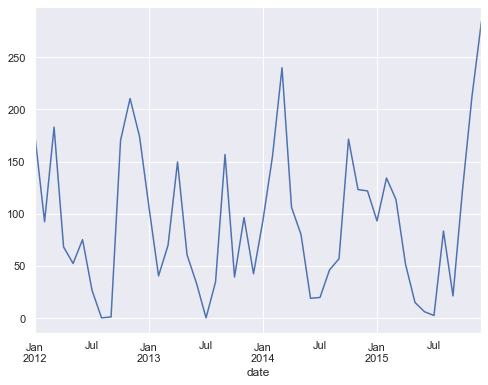

In [26]:
# Monthly
seattle_df.resample('M').sum().precipitation.plot()
# better, but still too noisy maybe

<AxesSubplot:xlabel='date'>

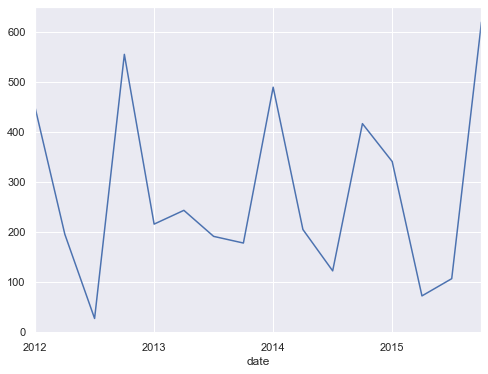

In [27]:
# Quarterly
seattle_df.resample('Q').sum().precipitation.plot()
# best

<AxesSubplot:xlabel='date'>

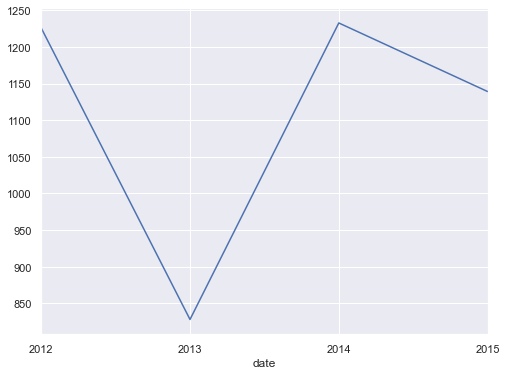

In [28]:
# Yearly
seattle_df.resample('A').sum().precipitation.plot()
# Goldilocks says too cold

4. Which year-month combination is the windiest?

In [29]:
seattle_df.resample('M').sum().nlargest(n=1, columns='wind')

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.50,259.80,118.60,134.60


5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [30]:
seattle_df['has_sun'] = seattle_df['weather']== 'sun'

In [31]:
seattle_df.resample('A').sum().nlargest(n=1, columns='has_sun')

,precipitation,temp_max,temp_min,wind,has_sun
date,,,,,
2014-12-31,1232.80,6203.50,3161.80,1236.50,211


6. In which month does it rain the most?

In [32]:
# Create 'month' column
seattle_df['month'] = seattle_df.index.month_name()

# let's look at volume first...
seattle_df.groupby('month').mean().nlargest(n=1, columns='precipitation')

,precipitation,temp_max,temp_min,wind,has_sun
month,,,,,
November,5.35,11.02,4.70,3.48,0.35


7. Which month has the most number of days with a non-zero amount of precipitation?

In [33]:
# What about if we were interested in number of days of rain?
seattle_df['has_rain'] = seattle_df['precipitation']>0
seattle_df.groupby('month').mean().nlargest(n=1, columns='has_rain')

,precipitation,temp_max,temp_min,wind,has_sun,has_rain
month,,,,,,
December,5.02,8.19,3.32,3.62,0.32,0.65


### Flights

In [34]:
df = data.flights_20k().set_index('date').sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


1. Convert any negative delays to 0.

In [35]:
def delay_to_zero(x):
    if x < 0:
        x = 0
    return x

In [36]:
# using function
df.delay = df.delay.apply(delay_to_zero)

In [37]:
# using np.where, MUCH FASTER FOR LARGE DATASET
df.delay = np.where(df.delay < 0, 0, df.delay)

2. Which hour of the day has the highest average delay?

In [38]:
df['hour'] = df.index.hour

In [39]:
df.groupby('hour').delay.mean().sort_values().tail(5)

hour
22    32.70
23    65.35
0    127.92
1    170.00
3    302.50
Name: delay, dtype: float64

3. Does the day of the week make a difference in the delay amount?

In [40]:
df['week_day'] = df.index.day_name()

In [41]:
df.groupby('week_day').delay.mean().sort_values(ascending=False)

week_day
Friday      17.76
Thursday    12.82
Wednesday   11.03
Sunday      10.41
Tuesday      9.41
Saturday     8.43
Monday       7.17
Name: delay, dtype: float64

4. Does the month make a difference in the delay amount?

In [43]:
df['month'] = df.index.month_name()
df.groupby('month').delay.mean()

month
February   12.31
January    11.30
March       9.88
Name: delay, dtype: float64

### Bonus

In [64]:
from vega_datasets import data
df = data.iowa_electricity()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [65]:
# first I need to reset the index...
df = prepare.index_reset(df, 'year')

1. For each row, calculate the percentage of the year's total that energy source provided.

In [66]:
df['percent_provided'] = df['net_generation'] / df.groupby('year').net_generation.sum() * 100

In [67]:
df.head()

,source,net_generation,percent_provided
year,,,
2001-01-01,Fossil Fuels,35361,86.99
2001-01-01,Nuclear Energy,3853,9.48
2001-01-01,Renewables,1437,3.53
2002-01-01,Fossil Fuels,35991,84.63
2002-01-01,Nuclear Energy,4574,10.76


2. Lineplot of generation over time, color by source

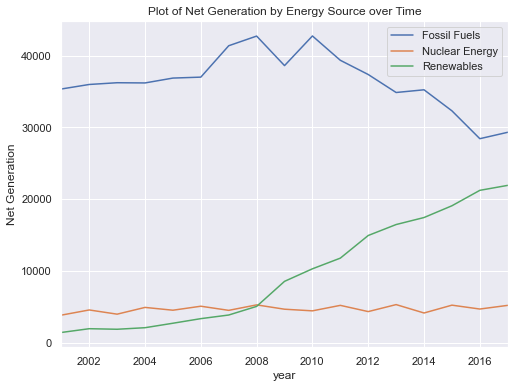

In [68]:
df[df['source']=='Fossil Fuels'].net_generation.plot(label= "Fossil Fuels")
df[df['source']=='Nuclear Energy'].net_generation.plot(label= "Nuclear Energy")
df[df['source']=='Renewables'].net_generation.plot(label= "Renewables")
plt.title('Plot of Net Generation by Energy Source over Time')
plt.ylabel('Net Generation')
plt.legend()
plt.show()

3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [69]:
new_df = df.pivot_table(index='source', columns='year', values='net_generation')
new_df

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

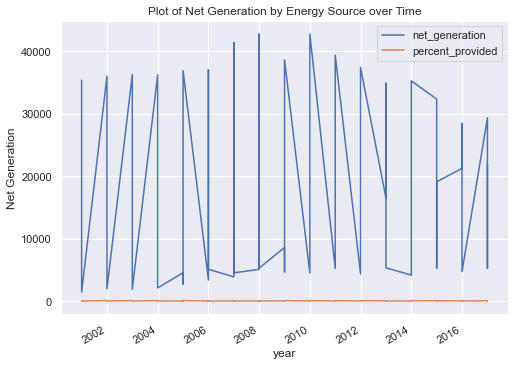

In [76]:
df.plot()
plt.title('Plot of Net Generation by Energy Source over Time')
plt.ylabel('Net Generation')
plt.legend()
plt.show()

5. Is the total generation increasing over time?

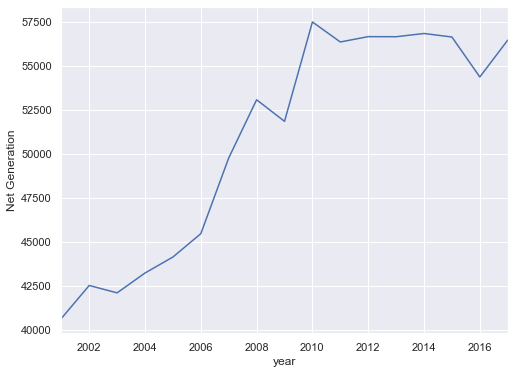

In [50]:
df.net_generation.resample('YS').sum().plot()
plt.ylabel('Net Generation')
plt.show()

5a. How would you control for increasing consumption over time when considering how much energy is coming from each source?

5b. express each number as a % of the year's total

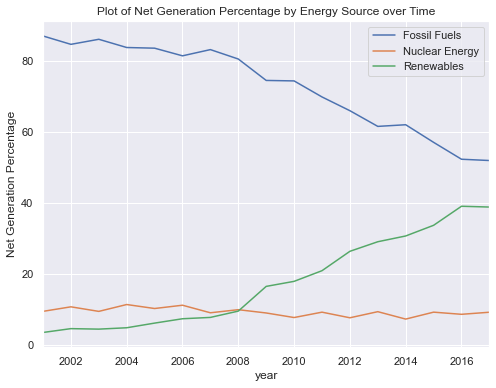

In [51]:
df[df['source']=='Fossil Fuels'].percent_provided.plot(label= "Fossil Fuels")
df[df['source']=='Nuclear Energy'].percent_provided.plot(label= "Nuclear Energy")
df[df['source']=='Renewables'].percent_provided.plot(label= "Renewables")
plt.title('Plot of Net Generation Percentage by Energy Source over Time')
plt.ylabel('Net Generation Percentage')
plt.legend()
plt.show()

### Mas Bonus

1. Use the sf_temps dataset

In [80]:
df = data.sf_temps()
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [81]:
# reset date to index...
df = prepare.index_reset(df, 'date')

2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [82]:
df['temp_cat'] = pd.cut(x= df['temp'], bins=4, labels=['cold', 'cool', 'warm', 'hot'])
df.head()

,temp,temp_cat
date,,
2010-01-01 00:00:00,47.80,cold
2010-01-01 01:00:00,47.40,cold
2010-01-01 02:00:00,46.90,cold
2010-01-01 03:00:00,46.50,cold
2010-01-01 04:00:00,46.00,cold


3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

In [89]:
months = df.resample('M')

In [104]:
df = prepare.add_month_col(df)

<AxesSubplot:xlabel='month,temp_cat,temp_cat'>

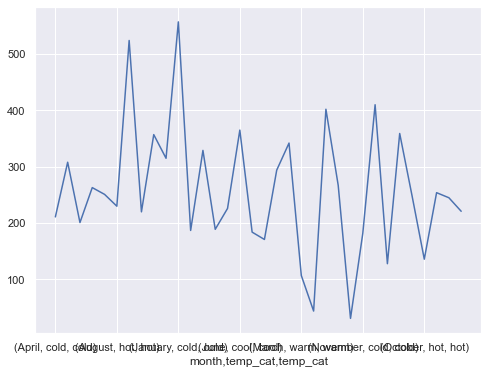

In [107]:
df.reset_index().groupby(['month', 'temp_cat']).temp_cat.value_counts().plot()

<AxesSubplot:xlabel='date', ylabel='temp'>

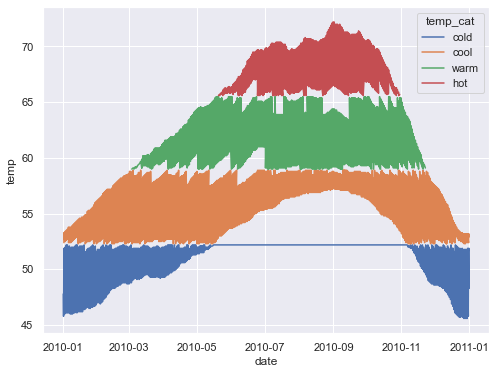

In [84]:
sns.lineplot(data = df, x = 'date', y = 'temp', ci = 0, hue = 'temp_cat')

In [59]:
prepare.add_month_col(df)

,temp,temp_cat,month
date,,,
2010-01-01 00:00:00,47.80,cold,January
2010-01-01 01:00:00,47.40,cold,January
2010-01-01 02:00:00,46.90,cold,January
2010-01-01 03:00:00,46.50,cold,January
2010-01-01 04:00:00,46.00,cold,January
...,...,...,...
2010-12-31 19:00:00,50.40,cold,December
2010-12-31 20:00:00,49.90,cold,December
2010-12-31 21:00:00,49.40,cold,December


In [58]:
df.head()

,temp,temp_cat,month
date,,,
2010-01-01 00:00:00,47.80,cold,47.80
2010-01-01 01:00:00,47.40,cold,47.40
2010-01-01 02:00:00,46.90,cold,46.90
2010-01-01 03:00:00,46.50,cold,46.50
2010-01-01 04:00:00,46.00,cold,46.00


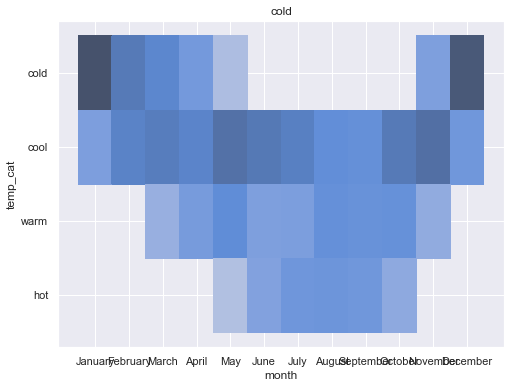

In [62]:
sns.histplot(data = df, x='month', y='temp_cat')
plt.title('cold')
plt.show()

4. Create pretty labels for time plots

5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

### Mas Mas Bonus

1. Explore the birdstrikes dataset.

In [ ]:
df = data.birdstrikes()